In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

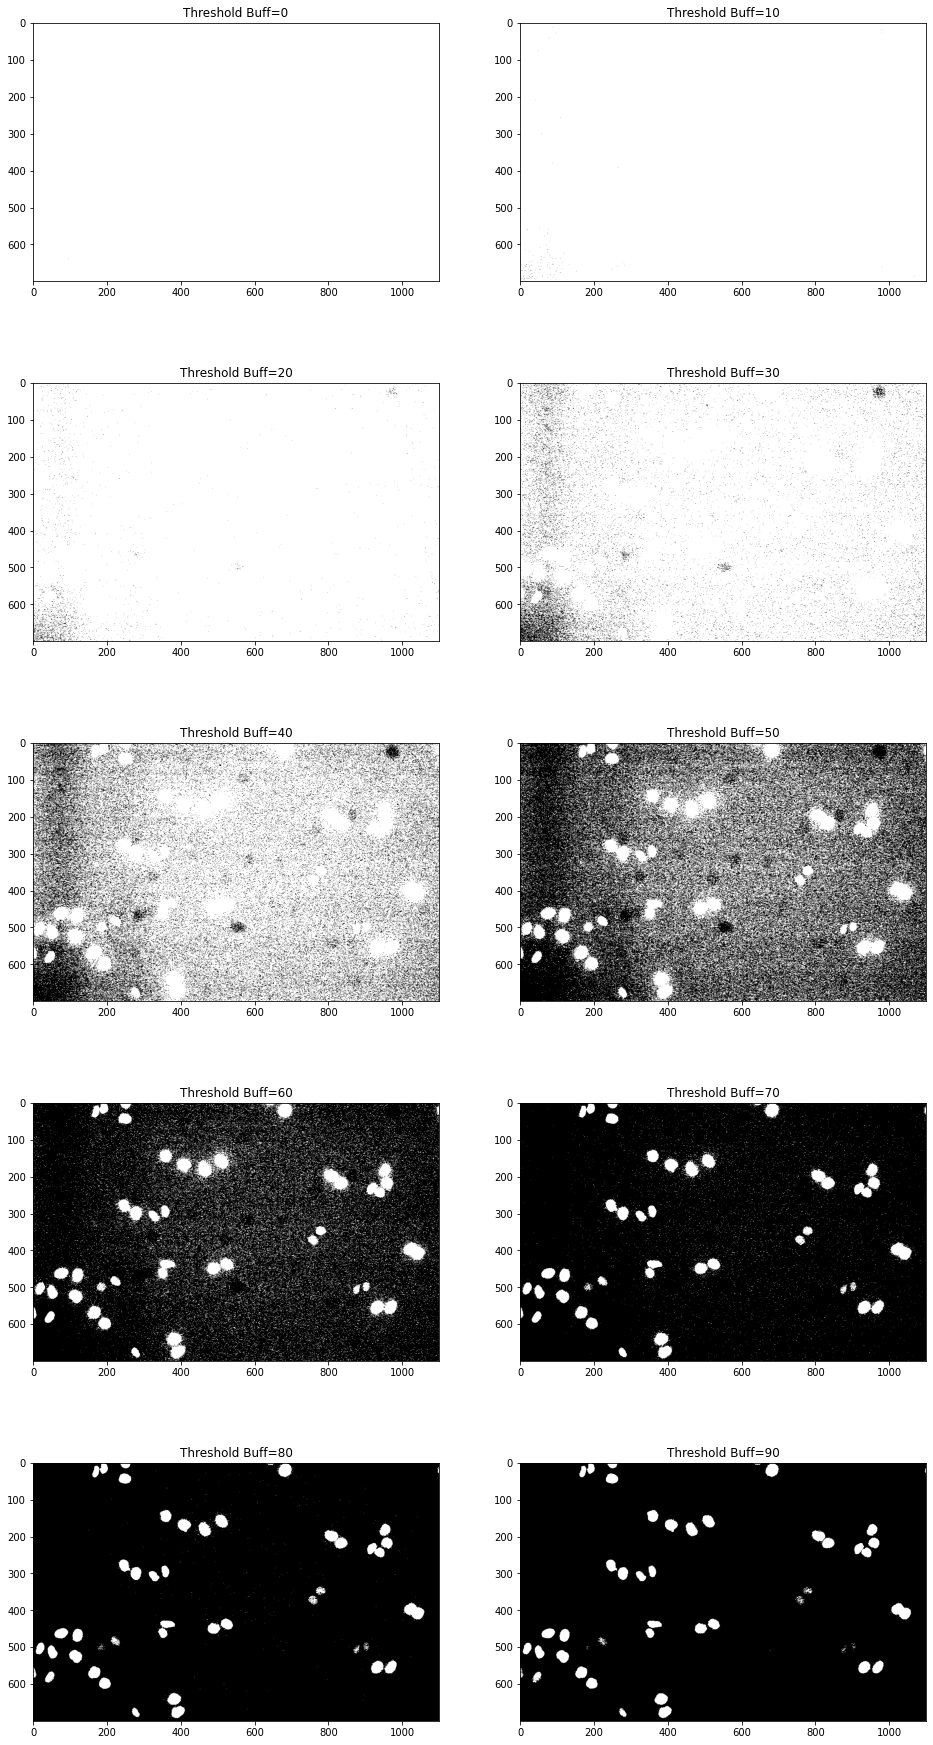

In [9]:
img = cv2.imread('../sequences/01/t000.tif', -1) # Load 16-bit grayscale image

min_16 = np.iinfo(img.dtype).min
max_16 = np.iinfo(img.dtype).max

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16, 32))
buff = 0
for ax in axs.flat:
    _, thresh = cv2.threshold(img, np.amin(img) + buff, max_16, cv2.THRESH_BINARY)
    
    ax.set_title("Threshold Buff=" + str(buff))
    ax.imshow(thresh, cmap='gray', vmin=min_16, vmax=max_16)
    
    buff = buff + 10


<font color='red'>
60 and 70 seem to be the best, 50 has too much noise 80 begins removing some of the fainter ones:
<ul>
    <li> 60 has more noise, but the fainter ones are more clear. </li>
    <li> 70 has no noise, but the fainter ones are less clear. </li>
</ul>
</font>

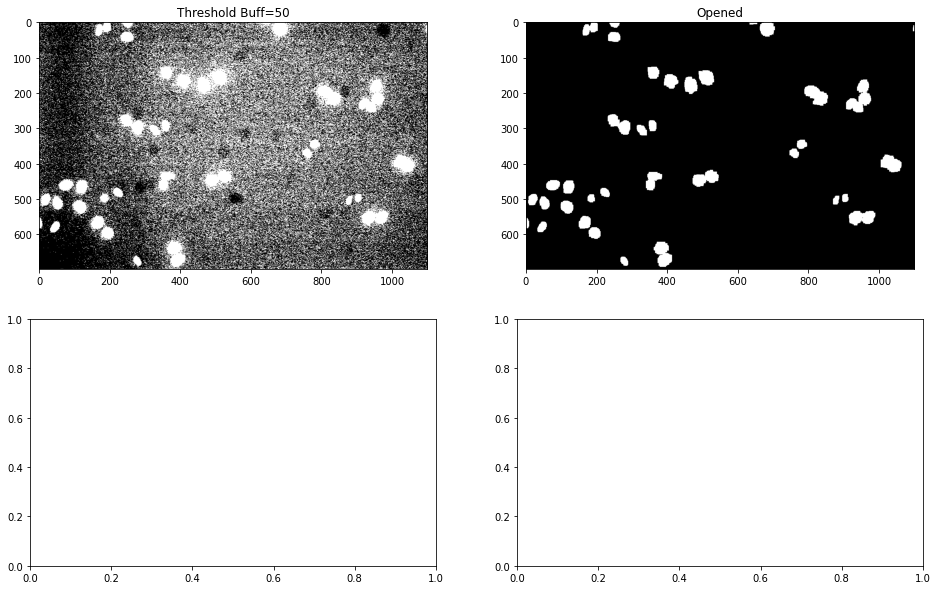

In [56]:
# Choosing 50 for the threshold buffer.
buff = 50
kernel = np.ones((5,5),np.uint8)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

# Threshold
_, thresh = cv2.threshold(img, np.amin(img) + buff, max_16, cv2.THRESH_BINARY)
axs[0].set_title("Threshold Buff=" + str(buff))
axs[0].imshow(thresh, cmap='gray', vmin=min_16, vmax=max_16)

# Opening
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
axs[1].set_title("Opened")
axs[1].imshow(opened, cmap='gray', vmin=min_16, vmax=max_16)


<font color='red'>
After experimentation, it turns out that performing an opening operation actually does an extremely good job at removing the harsh noise present in the 50 threshold image. For this reason, I used 50 threshold instead of 60. Doing 1 opening iteration was not quite enough, 2 performed really well, as can be seen above. Bluring, opening and closing were all tried in differing orders and this is what turned out best.
</font>